The image size is 299 by 196 pixels.


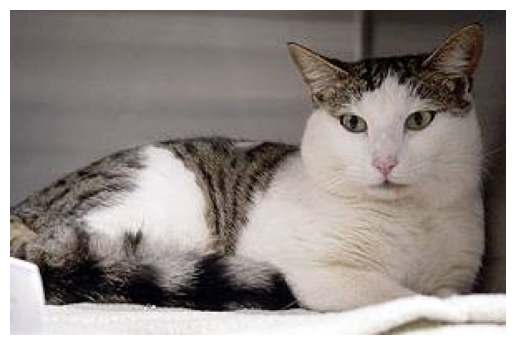

In [11]:
from PIL import Image 
import matplotlib.pyplot as plt

img = Image.open('train/cat/cat.50.jpg')
print(f'The image size is {img.size[0]} by {img.size[1]} pixels.')
plt.imshow(img)
plt.axis("off")
plt.show()

The image size is 396 by 500 pixels.


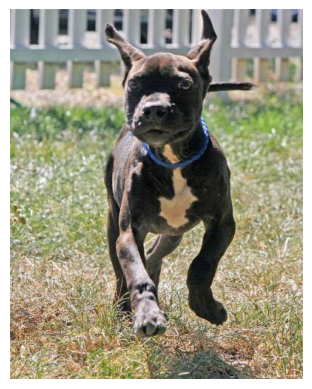

In [12]:
from PIL import Image 
import matplotlib.pyplot as plt

img = Image.open('train/dog/dog.352.jpg')
print(f'The image size is {img.size[0]} by {img.size[1]} pixels.')
plt.imshow(img)
plt.axis("off")
plt.show()

In [13]:
from tensorflow.keras.utils import image_dataset_from_directory

base_dir = 'train'
images = image_dataset_from_directory(base_dir, labels='inferred', label_mode = 'int', batch_size = 6, seed = 1234)

Found 6 files belonging to 2 classes.


In [14]:
import matplotlib.pyplot as plt

def display_images(image_batch, label_batch):
  class_names = images.class_names
  plt.figure(figsize=(12,3))
  for i in range(len(image_batch)):
    ax = plt.subplot(1, len(image_batch), i+1)
    img = image_batch[i].numpy().astype('uint8')
    lbl = class_names[int(label_batch[i])]
    h,w, _ = img.shape
    plt.imshow(img)
    plt.title(f'{lbl} \nSize: {h}x{w}')
    plt.axis('off')
  plt.tight_layout()
  plt.show()


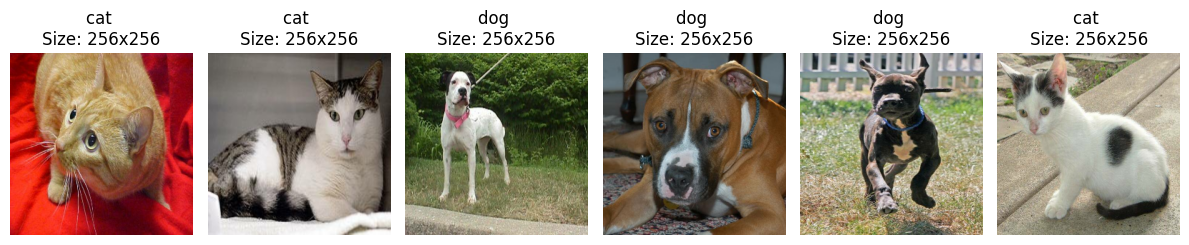

In [15]:
for image_batch, label_batch in images.take(1):
  display_images(image_batch, label_batch)

In [16]:
# center-crop and resize
cropped_images = image_dataset_from_directory(
  base_dir,
  labels = 'inferred',
  label_mode = 'int',
  crop_to_aspect_ratio = True,
  image_size = (224, 224),
  batch_size = 6,
  seed = 1234
)

Found 6 files belonging to 2 classes.


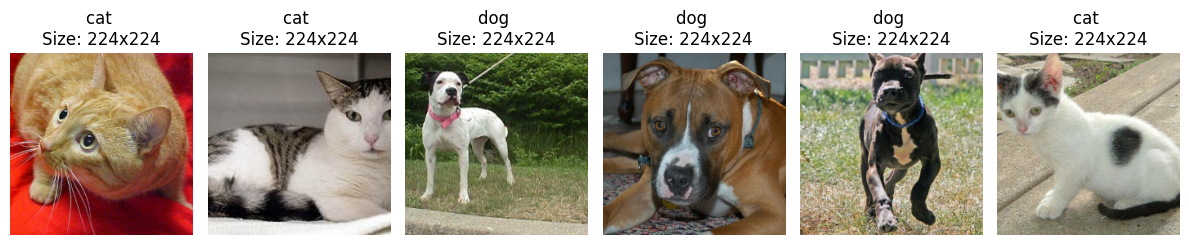

2025-06-29 18:18:08.529129: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [17]:
for image_batch, label_batch in cropped_images.take(1):
  display_images(image_batch, label_batch)

In [ ]:
# Normalize Pixel Values from 8-bit encoding (0, 255) to 0 to 1 range

from tensorflow import keras
from keras import layers

# create a keras model that normalizes automatically
preprocessing_layer = keras.Sequential([layers.Rescaling(1/255)])


In [ ]:
# pass all the images through the preprocessing layer
normalized_images = image.map(lambda image, label: (preprocessing_layer(image), label))